In [135]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import seaborn as sns

## mnist Supervised learning using tensorflow keras

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2539 - accuracy: 0.9268 - val_loss: 0.1345 - val_accuracy: 0.9616
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9682 - val_loss: 0.1022 - val_accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0788 - val_accuracy: 0.9765
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9743
Test Accuracy: 0.9743000268936157


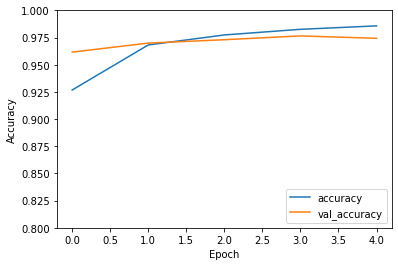

In [136]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

## Supervised Learning Linear Regression with Scikit-learn  

Mean Squared Error: 0.6536995137170021


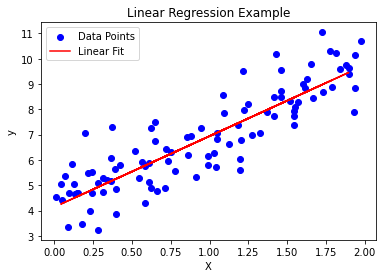

In [137]:
# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the results
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_test, y_pred, color="red", label="Linear Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Example")
plt.show()


## Unsupervised Learning: K-means Clustering with SCikit-learn

C:\Users\Mahra\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


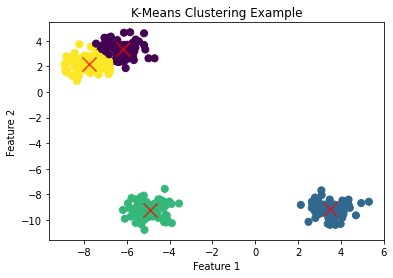

In [138]:
# Generate synthetic data for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=41)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("K-Means Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Neural network feed forward network using TF

In [139]:
# Generate synthetic data for binary classification
np.random.seed(42)
X_train = np.random.rand(1000, 20)
y_train = (np.sum(X_train, axis=1) > 10).astype(int)

# Create a simple feedforward neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {accuracy}")

Epoch 1/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6987 - accuracy: 0.5288 - val_loss: 0.6684 - val_accuracy: 0.5600
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5550 - val_loss: 0.6648 - val_accuracy: 0.5800
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5725 - val_loss: 0.6636 - val_accuracy: 0.6000
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.5975 - val_loss: 0.6551 - val_accuracy: 0.6050
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6075 - val_loss: 0.6504 - val_accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.6388 - val_loss: 0.6382 - val_accuracy: 0.6350
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6112 - val_loss: 0.6426 - val_accuracy: 0.6500
Epoch 8/10
25/25 [==

## Transformers: for text classification using hugging face transformers library

In [140]:
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)
#sample data
texts = ["I love programming.", "I dislike bugs."]
labels = tf.constant([1, 0])  # 1 positive 0  negative
encodings = tokenizer(texts, truncation=True, padding=True, max_length=32, return_tensors='tf')
input_ids, attention_mask = encodings['input_ids'], encodings['attention_mask']
optimizer = Adam(learning_rate=3e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Custom training loop
epochs = 2
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        outputs = model({"input_ids": input_ids, "attention_mask": attention_mask}, training=True)
        loss = loss_fn(labels, outputs.logits)
        
    # Compute gradients and update weights
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}")
# Evaluate on sample data
outputs = model({"input_ids": input_ids, "attention_mask": attention_mask})
print("Model outputs:", outputs.logits)  # Use .logits to get classification scores

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.7750425338745117
Epoch 2, Loss: 0.6352666020393372
Model outputs: tf.Tensor(
[[-0.44193766  0.04986779]
 [ 0.4058327  -0.11002986]], shape=(2, 2), dtype=float32)


## Logistic Regression Example with Scikit-learn

In [141]:
# Load the iris dataset
data = load_iris()
X = data['data']
y = data['target']

# Binary classification: only using class 0 and 1
X = X[y != 2]
y = y[y != 2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Support Vector Machine (SVM) Example with scikit-learn


In [142]:
# Load the iris dataset
iris  = load_iris()
a = iris.data
b = iris.target
# Binary classification: Only using class 0 and 1
a = a[b != 2]
b = b[b != 2]
# Split into training and test sets
x,xt,y,yt = train_test_split(a,b,test_size=0.2,random_state = 42)
# Train a Support Vector Machine model
svm = SVC(kernel='linear')
svm.fit(x,y)
#Predict on test set
y_pred = svm.predict(xt)
#Print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(yt,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Decision Tree Example with scikit-learn

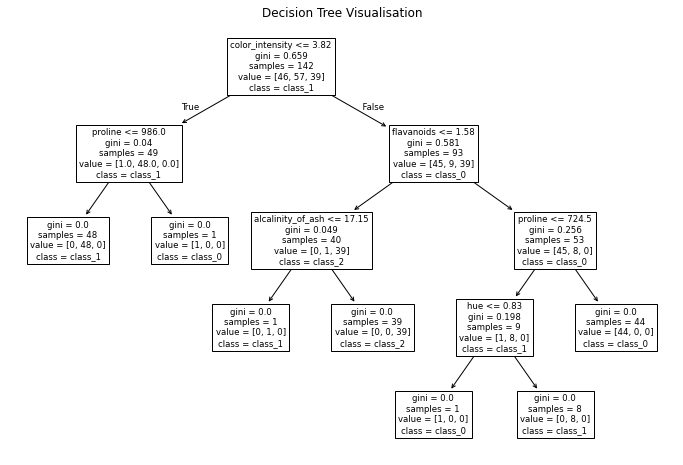

In [143]:
# Load the wine dataset
data = load_wine()
a = data.data
b = data.target
# Split into training and test sets
x,xt,y,yt = train_test_split(a,b, test_size=0.2, random_state = 50)
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=50)
clf.fit(x,y)
# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names = data.feature_names, class_names= data.target_names)
plt.title("Decision Tree Visualisation")
plt.show()

## Random Forest Example with scikit-learn


In [144]:
# Load the wine dataset
data = load_wine()
a = data.data
b = data.target
# Split into training and test sets
x,xt,y,yt = train_test_split(a,b, test_size=0.2, random_state = 42)
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x,y)
# Predict on test data
y_pred = rf_clf.predict(xt)
# Evaluate the model
accuracy = accuracy_score(yt, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 1.0


## Hierarchical Clustering Example with scipy and matplotlib


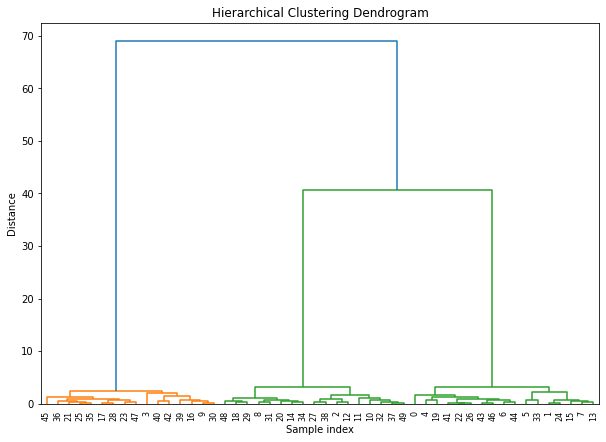

In [145]:
# Generate synthetic data
a,b = make_blobs(n_samples=50,centers= 3, cluster_std=0.60, random_state=42)
# Perform hierarchical clustering
Z = linkage(a, 'ward')
# Plot the dendrogram
plt.figure(figsize=(10,7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Principal Component Analysis (PCA) Example with scikit-learn


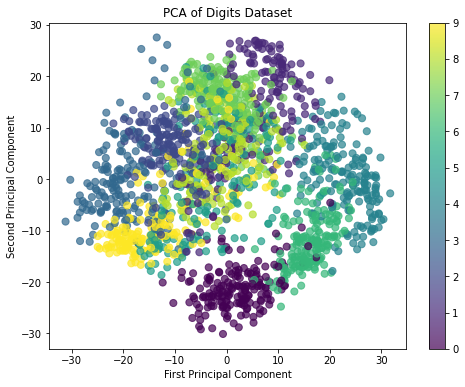

In [146]:
# Load the digits dataset
digits = load_digits()
a = digits. data
# Perform PCA
pca = PCA(n_components=2)
a_pca = pca.fit_transform(a)
# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=digits.target, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title("PCA of Digits Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE) Example with scikit-learn


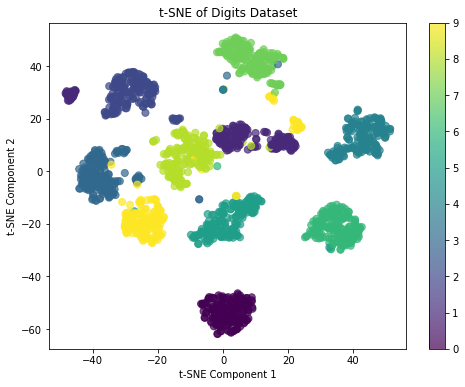

In [147]:
# Perform t-SNE on the digits dataset
tsne = TSNE(n_components=2, random_state=42)
a_tsne = tsne.fit_transform(a)
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(a_tsne[:, 0], a_tsne[:, 1], c=digits.target, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title("t-SNE of Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## Association Rule Mining Example: Apriori Algorithm with mlxtend


C:\Users\Mahra\miniconda3\envs\tf\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


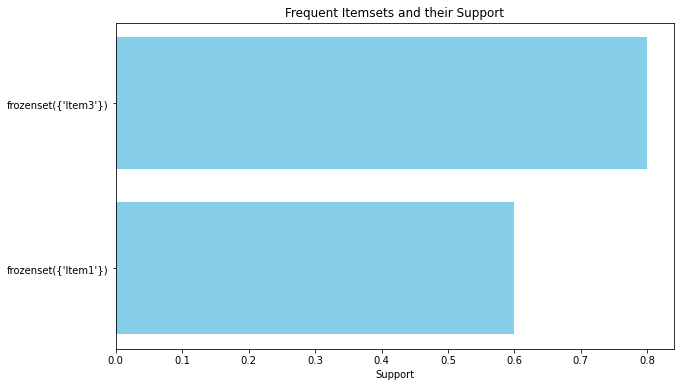

No association rules were generated with the specified confidence and lift thresholds.
Frequent Itemsets:
   support itemsets
0      0.6  (Item1)
1      0.8  (Item3)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [149]:
# a small dataset for demonstration
data = {'Item1': [1, 0, 1, 1, 0],
        'Item2': [0, 1, 0, 1, 0],
        'Item3': [1, 1, 1, 0, 1],
        'Item4': [0, 0, 0, 1, 0]}

df = pd.DataFrame(data)
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
# Visualization 1: Frequent Itemsets and their Support
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Frequent Itemsets and their Support')
plt.show()

# Check if there are any association rules generated
if not rules.empty:
    # Visualization 2: Association Rules - Confidence vs Lift
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules, x='confidence', y='lift', hue='support', size='support', sizes=(40, 200), palette='viridis', legend='brief')
    plt.title('Association Rules: Confidence vs Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.legend(title='Support', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
else:
    print("No association rules were generated with the specified confidence and lift thresholds.")

# Display Frequent Itemsets and Association Rules as DataFrames for reference
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)